### Forest Fires 

#### Exploratory Data Analysis

In [1]:
#Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Load the data 
fire=pd.read_csv('forest_fires.csv')
fire.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [3]:
fire.tail()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00
516,6,3,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,0.00


In [4]:
#Get the info of the data 
print('\nEDA on Fire data\n')
print('*'*25)
print('\nNumber of Records: ',fire.shape[0])
print('Number of Variables: ',fire.shape[1])
print('\nColumn Names\n',fire.columns)
print('\nDtypes:\n',fire.dtypes)
print('\nMissing data\n',fire.isnull().sum())
print('\n__Unique values in each category__\n')
for i in fire.columns:
    print(i,'----->',fire[i].nunique())


EDA on Fire data

*************************

Number of Records:  517
Number of Variables:  13

Column Names
 Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')

Dtypes:
 X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

Missing data
 X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

__Unique values in each category__

X -----> 9
Y -----> 7
month -----> 12
day -----> 7
FFMC -----> 106
DMC -----> 215
DC -----> 219
ISI -----> 119
temp -----> 192
RH -----> 75
wind -----> 21
rain -----> 7
area -----> 251


In [5]:
#get the statistical information of the data 
fire.describe().T

,count,mean,std,min,25%,50%,75%,max
X,517.0,4.669246,2.313778,1.0,3.0,4.00,7.00,9.00
Y,517.0,4.299807,1.229900,2.0,4.0,4.00,5.00,9.00
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40


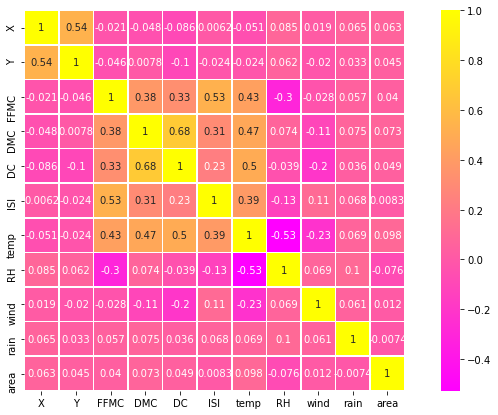

In [6]:
#Visualize the correlation of the variables with each data
plt.figure(figsize=(13,7))
sns.heatmap(fire.corr(),annot=True,cmap='spring',square=True,linewidths=0.5)

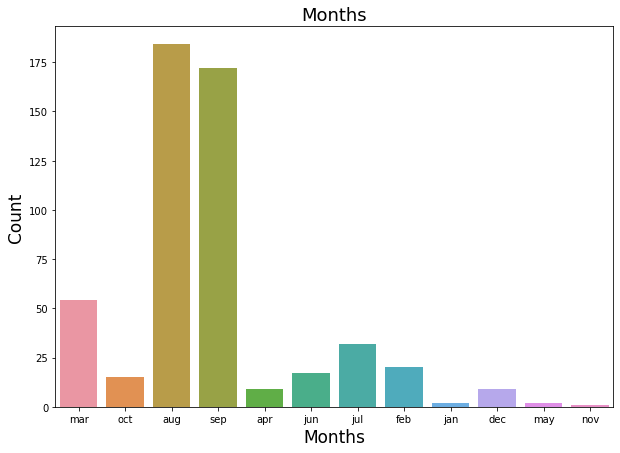

In [7]:
plt.figure(figsize=(10,7))
ax=sns.countplot(fire['month'])
ax.set_title('Months',fontsize=18)
ax.set_ylabel('Count',fontsize=17)
ax.set_xlabel('Months',fontsize=17)
plt.show()

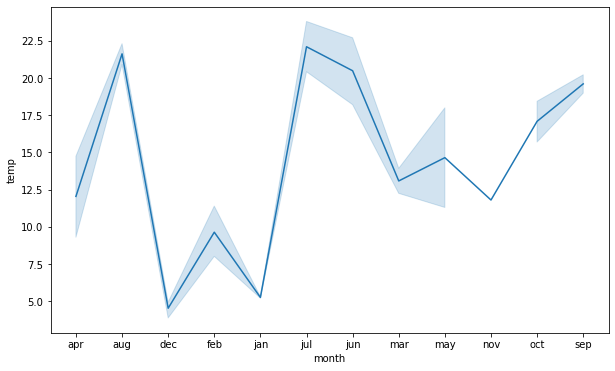

In [8]:
plt.figure(figsize=(10,6))
sns.lineplot(fire['month'],fire['temp'])

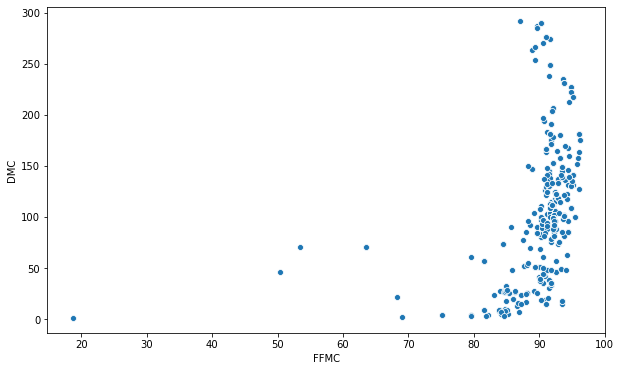

In [9]:
#Realtion ship between FFMC & DMC
plt.figure(figsize=(10,6))
sns.scatterplot(x='FFMC',y='DMC',data=fire)
plt.show()

In [10]:
#Check the realtionship between the months vs features
def plot_data(data,variable,ef='month'):
    plt.figure(figsize=(10,7))
    plt.style.use('fivethirtyeight')
    ax=sns.barplot(x=ef,y=variable,data=data,palette='dark')
    ax.set_title('Relationship between Month vs '+variable,fontsize=19)
    ax.set_xlabel('Months',fontsize=17)
    plt.show()

In [11]:
col_plot=fire[['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind','area']]

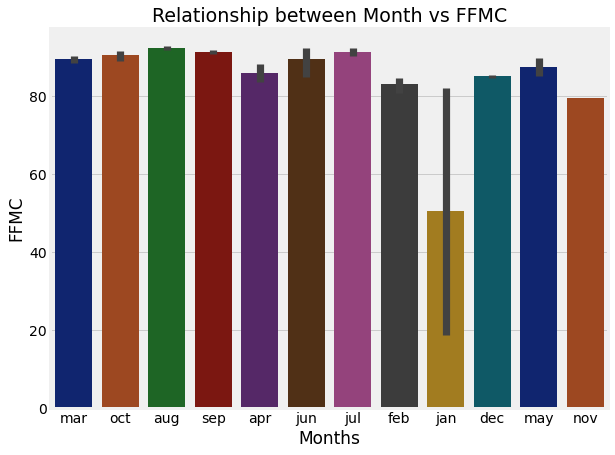

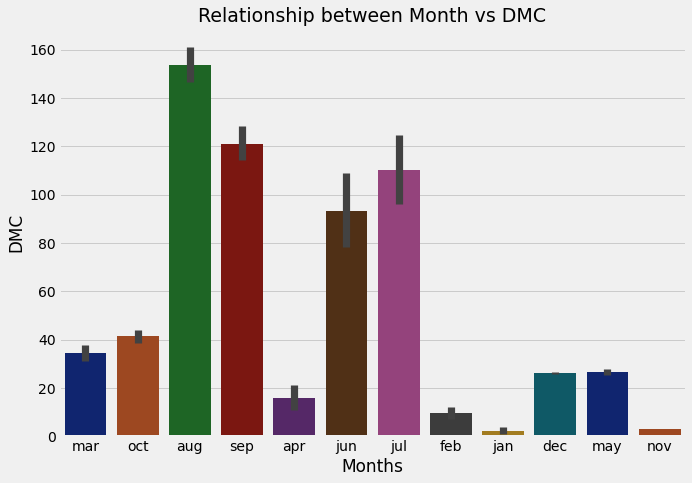

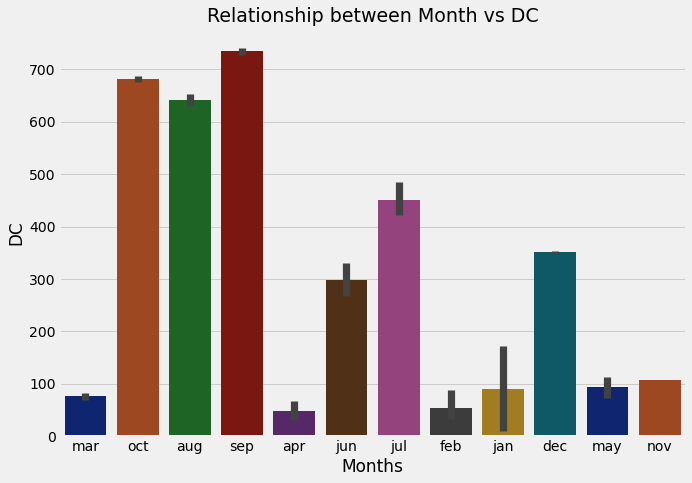

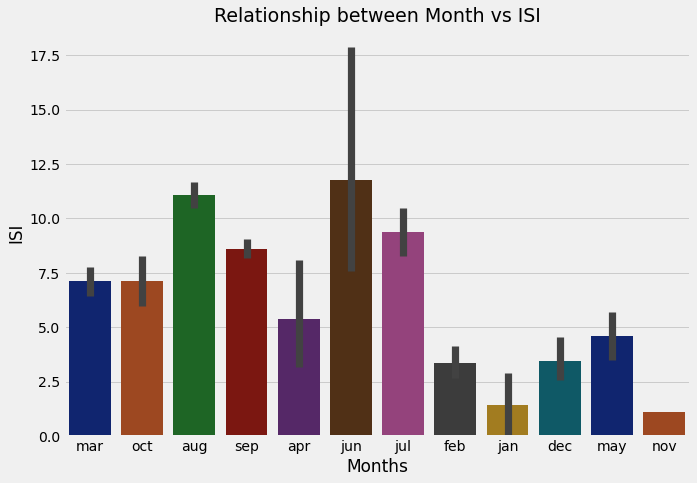

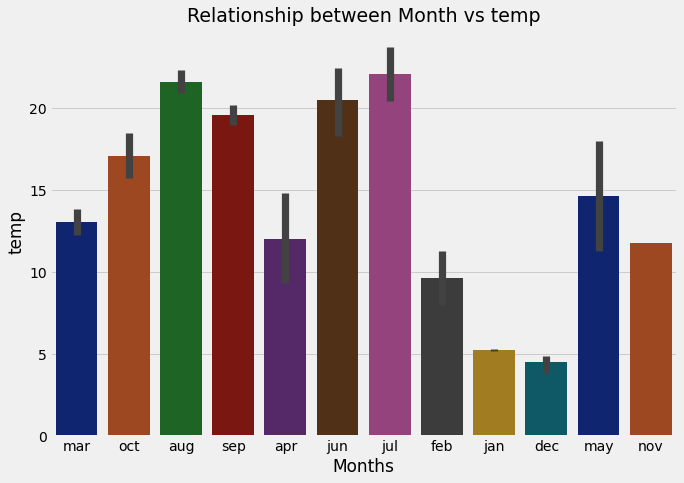

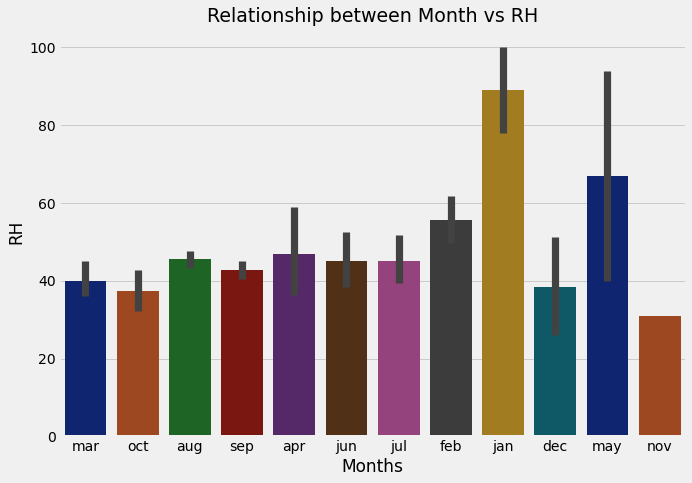

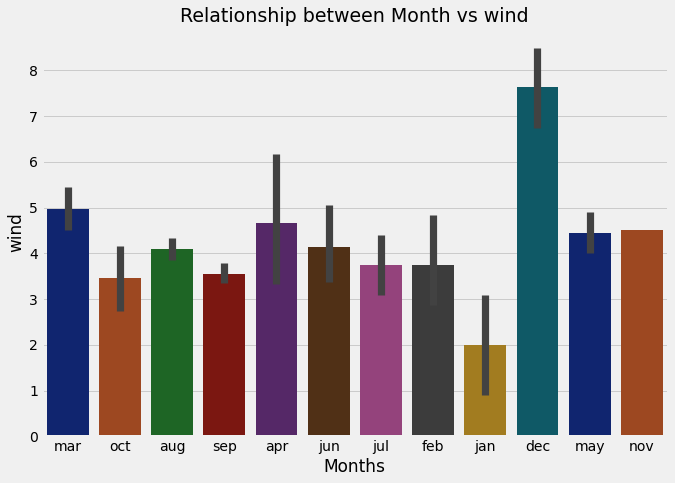

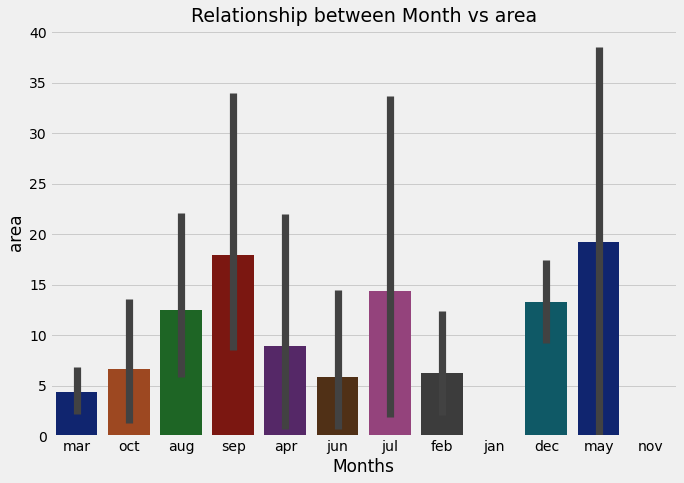

In [12]:
for feature in col_plot.columns:
    plot_data(fire,feature)

In [13]:
#Check the realtion ship between the days vs different variables by using barplot 
def plot_data(data,variable,ef='day'):
    plt.figure(figsize=(10,7))
    plt.style.use('fivethirtyeight')
    ax=sns.barplot(x=ef,y=variable,data=data,palette='bone')
    ax.set_title('Relationship between Day vs '+ variable,fontsize=19)
    ax.set_xlabel('Days',fontsize=17)
    plt.show()

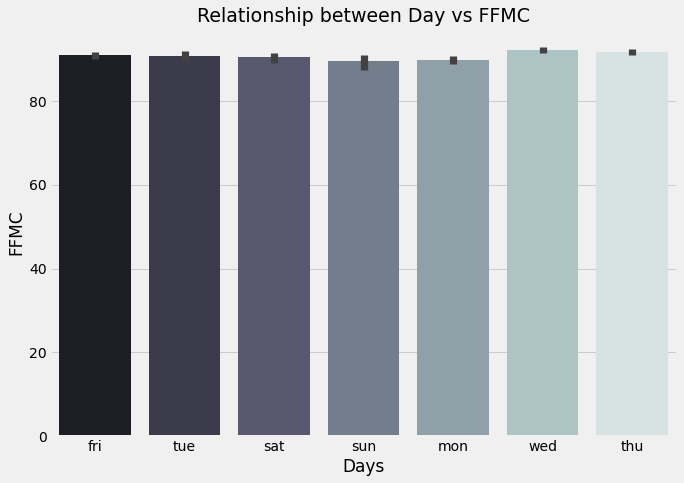

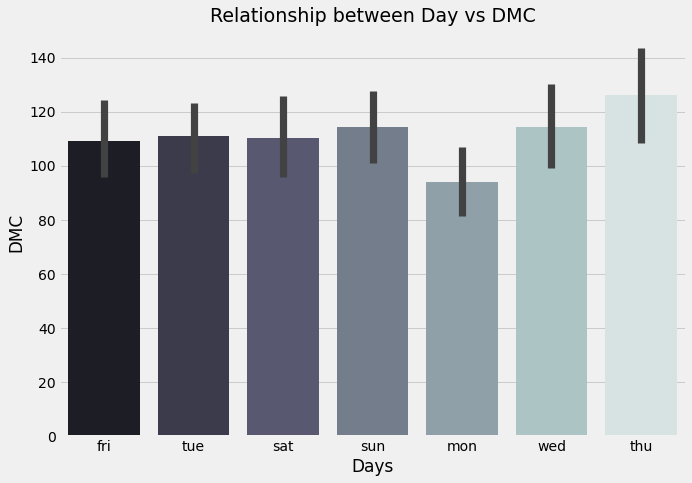

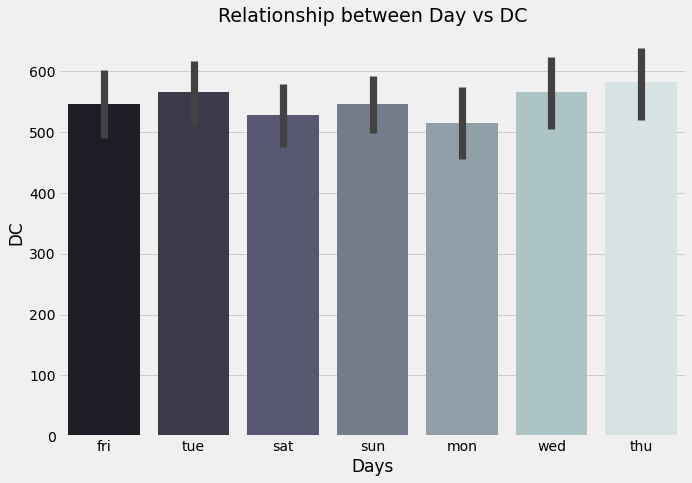

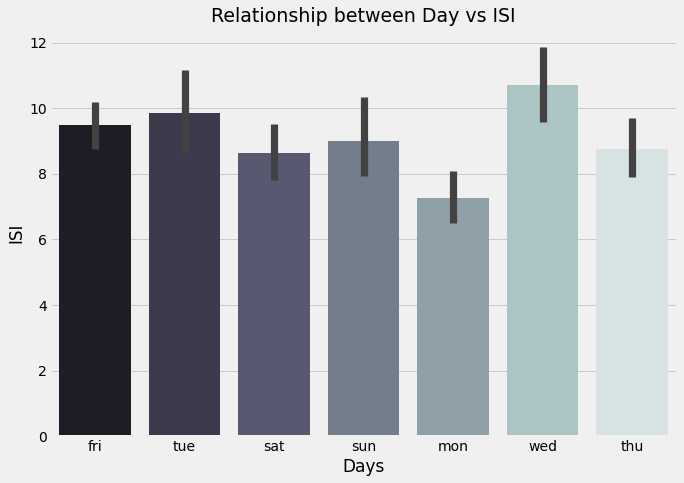

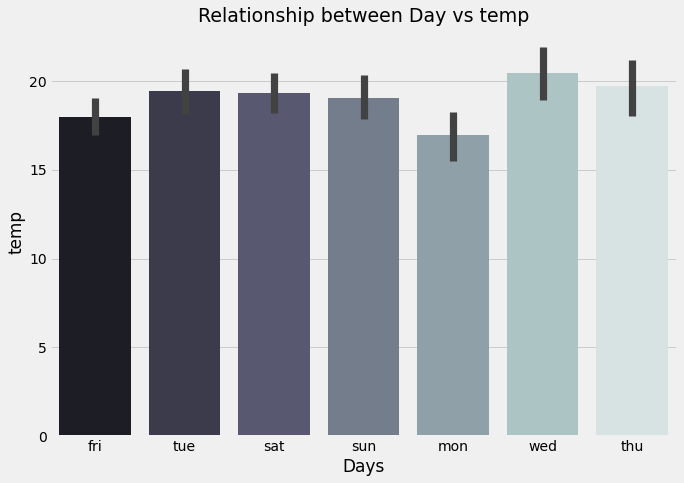

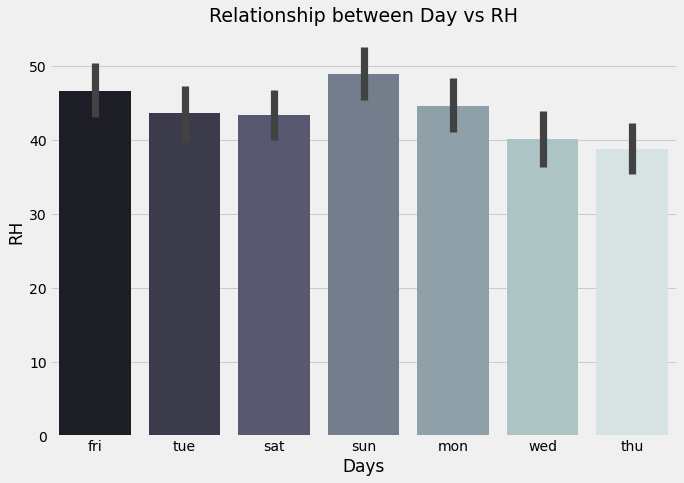

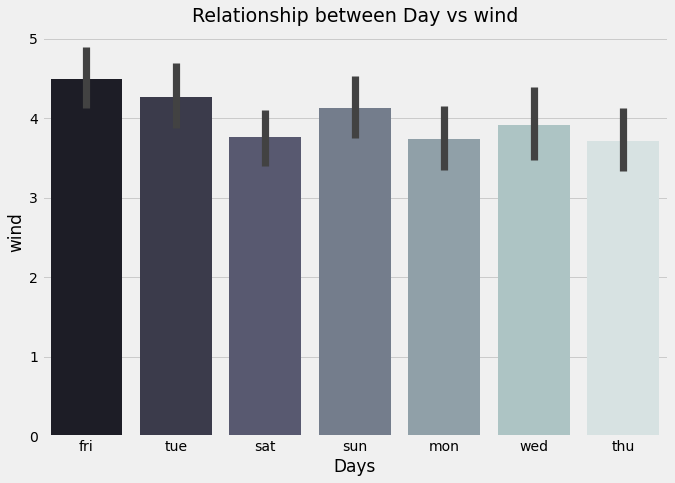

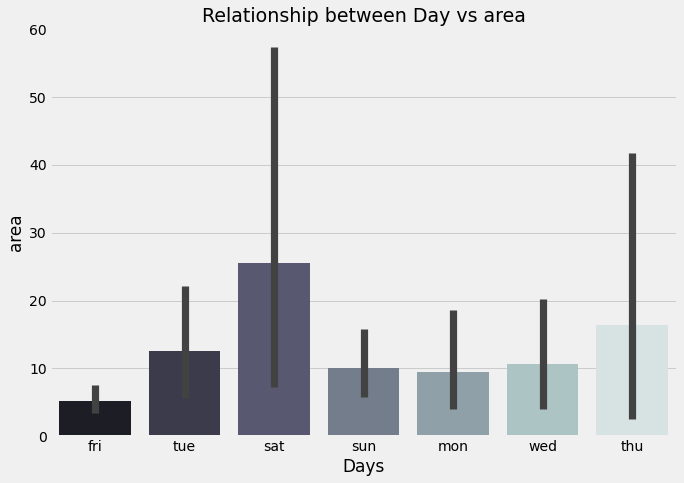

In [14]:
for f in col_plot.columns:
    plot_data(fire,f)

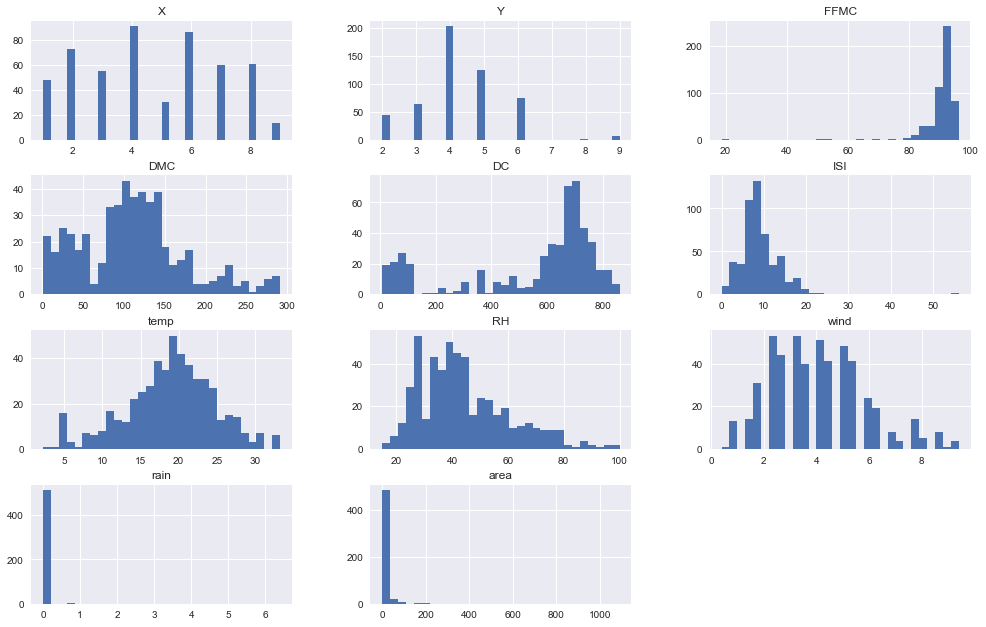

In [15]:
#Check the distribution of the data
plt.style.use('seaborn')
fire.hist(bins=30,figsize=(15,10))
plt.show()

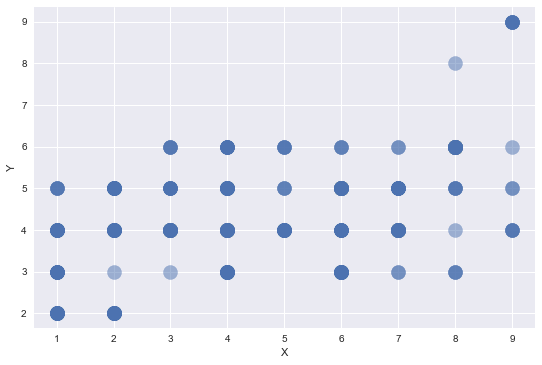

In [16]:
fire.plot(kind='scatter',x='X',y='Y',s=200,alpha=0.5)
plt.show()

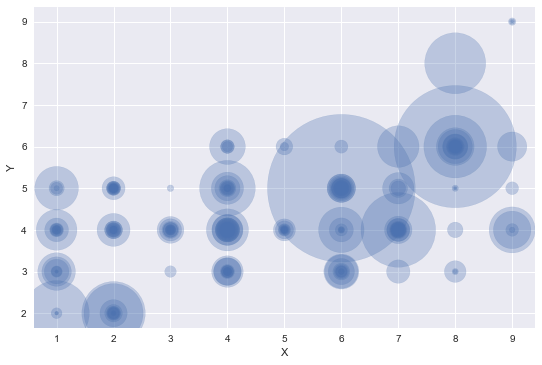

In [17]:
fire.plot(kind='scatter',x='X',y='Y',s=20*fire['area'],alpha=0.3) #plotting the graphs by increasing the size to see the affect of the data

In [18]:
#Rename or the encode the categries in the column such as 'month','day' in to numerical values.
fire['day'].replace({'sun':1,'mon':2,'tue':3,'wed':4,'thu':5,'fri':6,'sat':7},inplace=True)
fire['month'].replace({'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12},inplace=True)

In [19]:
#After transforming the data look ike
fire.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,6,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,3,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,7,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,1,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


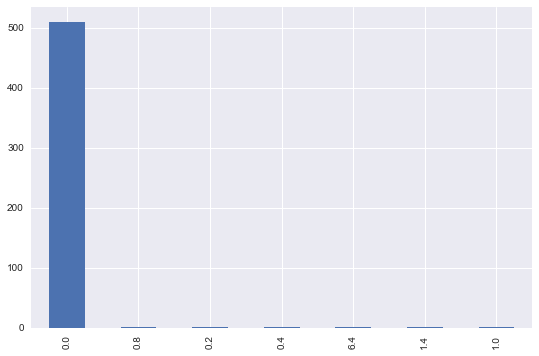

In [24]:
#Check the Count of values in the rain dataset
fire['rain'].value_counts().plot.bar()